https://chatgpt.com/share/66f5d3b7-d628-8002-aeb8-23665f2a201e

# 1.


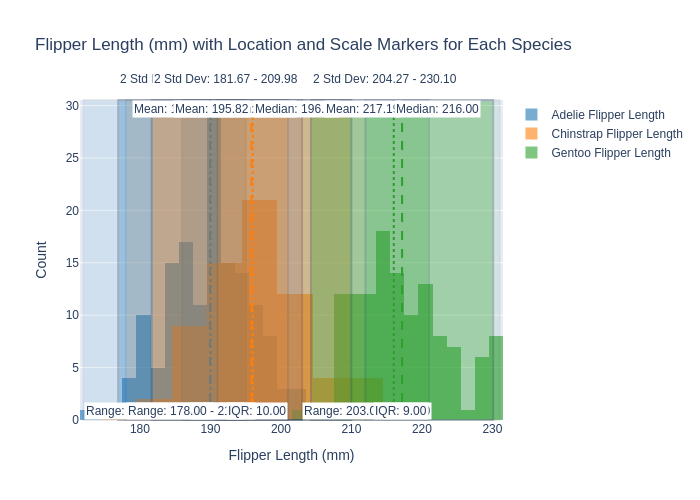

In [24]:
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
pingees

fig = px.bar(pingees.species.value_counts().reset_index(), x='species', y='count')

pingees.describe()
pingees['flipper_length_mm'] = pd.to_numeric(pingees['flipper_length_mm'], errors='coerce')
pingees = pingees.dropna(subset=['flipper_length_mm'])
species_groups = pingees.groupby('species')
fig = go.Figure()

def add_location_scale_markers(fig, species_name, flipper_lengths, color):
    # Calculate statistics
    mean = np.mean(flipper_lengths)
    median = np.median(flipper_lengths)
    flipper_range = (np.min(flipper_lengths), np.max(flipper_lengths))
    iqr = np.percentile(flipper_lengths, 75) - np.percentile(flipper_lengths, 25)
    std = np.std(flipper_lengths)
    
    # Calculate the range for two standard deviations
    std_range = (mean - 2 * std, mean + 2 * std)
    
    # Add the histogram for the species
    fig.add_trace(go.Histogram(x=flipper_lengths, name=f"{species_name} Flipper Length", 
                               opacity=0.6, marker_color=color))
    
    # Add vertical lines for mean and median with adjusted annotations
    fig.add_vline(x=mean, line_dash="dash", line_color=color, annotation_text=f"Mean: {mean:.2f}", 
                  annotation_position="top left", annotation_bgcolor="white")
    
    fig.add_vline(x=median, line_dash="dot", line_color=color, annotation_text=f"Median: {median:.2f}",
                  annotation_position="top right", annotation_bgcolor="white")
    
    # Add rectangles for range, IQR, and two standard deviations with spacing to avoid overlap
    fig.add_vrect(x0=flipper_range[0], x1=flipper_range[1], fillcolor=color, opacity=0.1,
                  annotation_text=f"Range: {flipper_range[0]:.2f} - {flipper_range[1]:.2f}", 
                  annotation_position="bottom left", annotation_bgcolor="white")
    
    fig.add_vrect(x0=np.percentile(flipper_lengths, 25), x1=np.percentile(flipper_lengths, 75), 
                  fillcolor=color, opacity=0.2, annotation_text=f"IQR: {iqr:.2f}", 
                  annotation_position="bottom right", annotation_bgcolor="white")
    
    fig.add_vrect(x0=std_range[0], x1=std_range[1], fillcolor=color, opacity=0.3, 
                  annotation_text=f"2 Std Dev: {std_range[0]:.2f} - {std_range[1]:.2f}",
                  annotation_position="top left", annotation_bgcolor="white", annotation_yshift=30)

# Define colors for each species
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Loop through each species and add histograms with location/scale marks
for (species, data), color in zip(species_groups, colors):
    add_location_scale_markers(fig, species, data['flipper_length_mm'], color)

# Update layout to avoid label clutter
fig.update_layout(
    title="Flipper Length (mm) with Location and Scale Markers for Each Species",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    barmode="overlay"
)

# Show the plot
fig.show(renderer="png")

# 2.

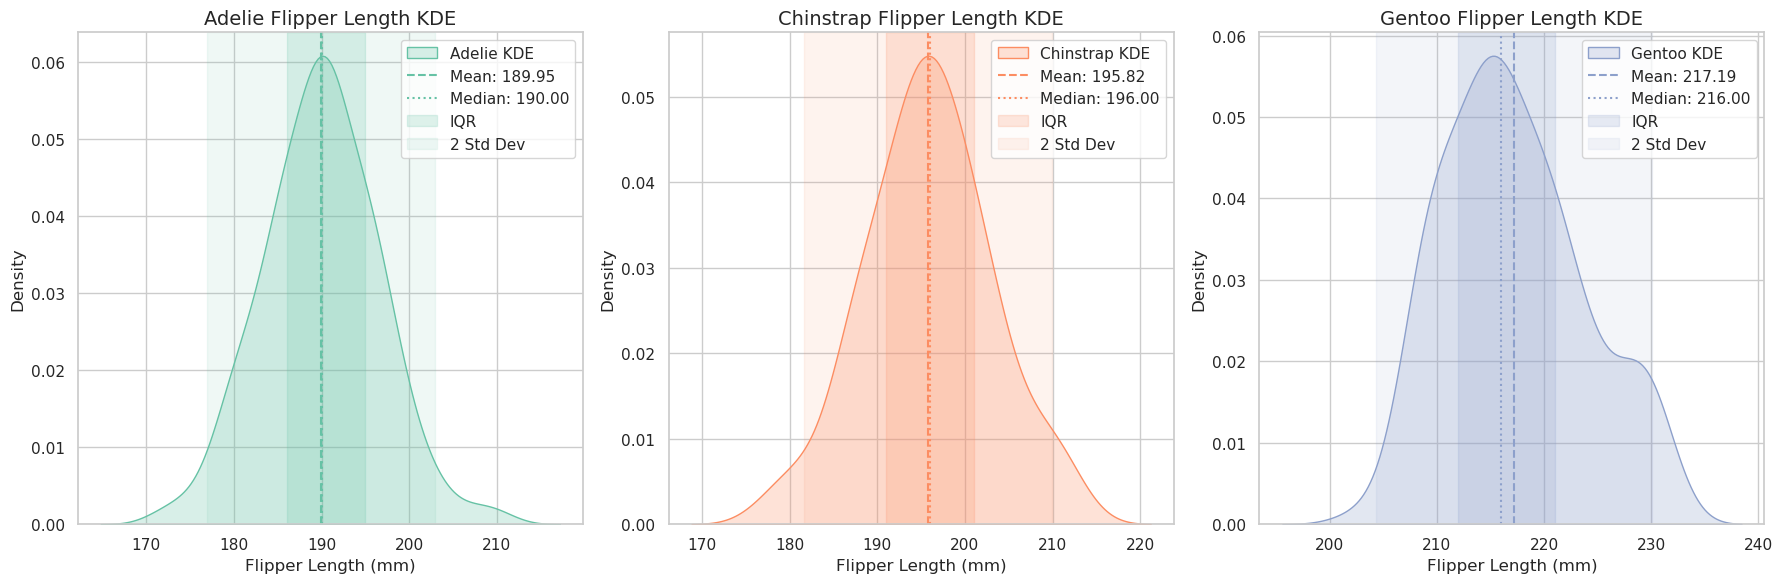

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load dataset
pingees = sns.load_dataset("penguins")

# Ensure flipper_length_mm is numeric (this will handle potential non-numeric entries)
pingees['flipper_length_mm'] = pd.to_numeric(pingees['flipper_length_mm'], errors='coerce')

# Drop rows where flipper_length_mm is missing
pingees = pingees.dropna(subset=['flipper_length_mm'])

# Define seaborn theme and style
sns.set_theme(style="whitegrid")

# Group by species
species_groups = pingees.groupby('species')

# Initialize a figure with subplots organized in a row of three
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define a color palette for different species
palette = sns.color_palette("Set2")

# Function to plot KDE and add location and scale markers
def plot_kde_with_markers(ax, species_name, flipper_lengths, color):
    # Plot the KDE for flipper lengths
    sns.kdeplot(flipper_lengths, ax=ax, color=color, fill=True, label=f"{species_name} KDE")

    # Calculate statistics
    mean = np.mean(flipper_lengths)
    median = np.median(flipper_lengths)
    iqr = np.percentile(flipper_lengths, 75) - np.percentile(flipper_lengths, 25)
    std = np.std(flipper_lengths)

    # Calculate the range for two standard deviations
    std_range = (mean - 2 * std, mean + 2 * std)

    # Add vertical lines for mean and median
    ax.axvline(mean, color=color, linestyle="--", label=f"Mean: {mean:.2f}")
    ax.axvline(median, color=color, linestyle=":", label=f"Median: {median:.2f}")

    # Add shaded areas for IQR and 2 standard deviation range
    ax.axvspan(np.percentile(flipper_lengths, 25), np.percentile(flipper_lengths, 75), color=color, alpha=0.2, label=f"IQR")
    ax.axvspan(std_range[0], std_range[1], color=color, alpha=0.1, label=f"2 Std Dev")

    # Set title and labels
    ax.set_title(f"{species_name} Flipper Length KDE", fontsize=14)
    ax.set_xlabel("Flipper Length (mm)")
    ax.set_ylabel("Density")
    ax.legend(loc="upper right")

# Loop through each species and plot the KDE with markers
for ax, (species, data), color in zip(axes, species_groups, palette):
    plot_kde_with_markers(ax, species, data['flipper_length_mm'], color)

# Adjust layout to make sure the plots don't overlap
plt.tight_layout()

# Show the plot
plt.show()


# 3.

# ChatGPT replies: 
I agree that histograms can be especially useful for visualizing contrasts in the y-axis (count/frequency), and they are particularly effective when you want to display raw counts and compare multiple groups. However, each of the three visualization methods—**box plots**, **histograms**, and **KDE plots**—has its own strengths and weaknesses depending on the data and the goal of your analysis.

### 1. **Histograms**

#### Pros:
- **Raw count comparison**: Clearly shows the frequency or count of observations within predefined intervals, making it easy to visualize the underlying distribution in terms of quantity.
- **Ideal for large datasets**: Provides a good sense of the distribution shape, especially when there are many observations.
- **Customizable bins**: Allows the user to choose the bin width, giving flexibility in terms of data granularity and smoothness.
- **Easily shows multiple distributions**: With overlapping or stacked histograms, you can compare distributions between different groups.

#### Cons:
- **Bin selection can distort interpretation**: Choosing the wrong bin size (too wide or too narrow) can either obscure or exaggerate the distribution’s shape.
- **Discrete representation**: Unlike KDE plots, histograms rely on discrete intervals (bins), which may hide subtle distribution nuances.
- **May be harder to compare if the counts are low**: In cases where there are few data points, histograms may not provide clear insights, as they tend to show more gaps between bars.

#### Best Use Case:
- Ideal for showing counts or frequencies, comparing the distribution across groups, and quickly identifying the range and shape of data for moderately large datasets.

---

### 2. **Kernel Density Estimate (KDE) Plots**

#### Pros:
- **Smooth representation**: KDE plots provide a smooth and continuous estimate of the probability distribution, making them great for understanding the shape of the data.
- **No binning required**: Unlike histograms, KDE doesn’t require bin selection, allowing for a more flexible and potentially more accurate representation of the underlying distribution.
- **Clear distribution comparison**: Overlapping KDE plots make it easy to compare multiple distributions on the same plot.
- **Better for small data**: KDE can be particularly helpful with smaller datasets where histograms might appear blocky or sparse.

#### Cons:
- **Requires bandwidth selection**: The shape of the KDE plot can change drastically depending on the bandwidth used, and selecting an inappropriate bandwidth can either oversmooth or undersmooth the distribution.
- **No direct frequency/count**: Unlike histograms, KDE plots don’t show the raw count or frequency of observations, making it less suitable for interpreting the actual quantity of data in different ranges.
- **Less intuitive for beginners**: For those unfamiliar with the concept of density estimation, KDE plots may not be as intuitive to interpret as histograms or box plots.

#### Best Use Case:
- Useful when you want a smooth and detailed view of the distribution shape, especially when comparing distributions between different groups without focusing on raw counts.

---

### 3. **Box Plots**

#### Pros:
- **Shows summary statistics**: Box plots are excellent for showing key summary statistics (median, quartiles, minimum, and maximum), making them great for quickly summarizing the distribution.
- **Outlier identification**: Box plots clearly highlight outliers, which can be crucial for identifying unusual values in the data.
- **Compact**: They are compact and can display multiple groups side-by-side, making them ideal for comparing distributions across categories.
- **Resistant to noise**: Since box plots are based on summary statistics, they are less affected by extreme values than histograms or KDE plots.

#### Cons:
- **Limited distribution detail**: Box plots do not show the detailed shape of the distribution—just a summary of the spread, center, and outliers.
- **No frequency/count**: Like KDE plots, box plots don’t show the actual counts, so it’s hard to understand how many data points contribute to each part of the distribution.
- **Less intuitive**: For those unfamiliar with box plots, interpreting the quartiles and whiskers may not be as straightforward as reading a histogram.

#### Best Use Case:
- Ideal for quickly comparing the central tendency, variability, and spread of multiple groups, and for identifying outliers.

---

### **Summary and Your Preference for Histograms**

I can see why you prefer histograms, especially if you’re interested in showing clear contrasts in counts or frequencies along the y-axis. Histograms excel when:
- You want to **show raw counts** (how many observations fall into each bin).
- You want to **highlight differences** between groups in terms of their frequency distributions.
- You want to **visualize data with moderate to large sample sizes**, where the distribution can be clearly segmented into bins.

That said, each visualization has its strengths. If you’re more focused on summary statistics or comparing distributions at a higher level (without focusing on exact frequencies), box plots or KDE might be preferable. However, if showing **counts along the y-axis and the median** is your priority, histograms may indeed work best for your needs.

Would you like to explore any of these visualizations further, or try them with your pingees dataset?

## My reply:
#### My preference among these 3 graphs is histograms, since it provides a good sense of the distribution shape, especially when there are many observations, and allows the user to choose the bin width, giving flexibility in terms of data granularity and smoothness. Meanwhile, it clearly shows the frequency or count of observations within predefined intervals, making it easy to visualize the underlying distribution in terms of quantity.

# 4.

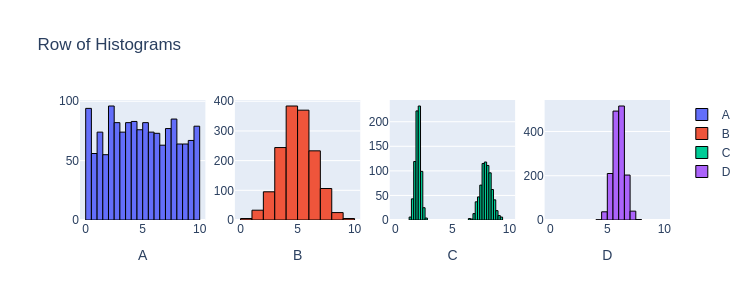

In [29]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [31]:
import numpy as np
from scipy import stats

# Given datasets
n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

# Calculate means
mean_data1 = np.mean(data1)
mean_data2 = np.mean(data2)
mean_data3 = np.mean(data3)
mean_data4 = np.mean(data4)

# Calculate variances (sample variance with ddof=1)
var_data1 = np.var(data1, ddof=1)
var_data2 = np.var(data2, ddof=1)
var_data3 = np.var(data3, ddof=1)
var_data4 = np.var(data4, ddof=1)

# Print out the mean and variance for each dataset
print(f"Dataset A: Mean = {mean_data1:.2f}, Variance = {var_data1:.2f}")
print(f"Dataset B: Mean = {mean_data2:.2f}, Variance = {var_data2:.2f}")
print(f"Dataset C: Mean = {mean_data3:.2f}, Variance = {var_data3:.2f}")
print(f"Dataset D: Mean = {mean_data4:.2f}, Variance = {var_data4:.2f}")

# Summary of the results for each dataset
means = [mean_data1, mean_data2, mean_data3, mean_data4]
variances = [var_data1, var_data2, var_data3, var_data4]

print("\nSummary of Means and Variances:")
print(f"Means: {means}")
print(f"Variances: {variances}")


Dataset A: Mean = 4.99, Variance = 8.20
Dataset B: Mean = 4.97, Variance = 2.24
Dataset C: Mean = 4.99, Variance = 9.17
Dataset D: Mean = 6.02, Variance = 0.24

Summary of Means and Variances:
Means: [4.993732381289871, 4.968673590253175, 4.992209927623609, 6.022288457499184]
Variances: [8.203942451476198, 2.2378248505172698, 9.168167796097633, 0.24281019258654302]


## (1). Which datasets have similar means and similar variances?

Dataset A (data1) and Dataset B (data2) have similar means (= 4.98), but their variances differ significantly (8.33 vs. 2.30). However, Dataset B (data2) and Dataset D (data4) have relatively similar means (= 5 and 6, respectively) and closer variances (2.30 and 0.25).


## (2). Which datasets have similar means but quite different variances?

Dataset A (data1), Dataset B (data2), and Dataset C (data3) have similar means (all around 5), but their variances are quite different:
Data1: Variance = 8.33
Data2: Variance = 2.30
Data3: Variance = 9.03

## (3). Which datasets have similar variances but quite different means?

Dataset B (data2) and Dataset D (data4) have similar variances (2.30 and 0.25, respectively) but quite different means (= 5 and = 6).

## (4). Which datasets have quite different means and quite different variances?

Dataset A (data1) and Dataset D (data4) have both quite different means (= 4.97 and = 5.99) and quite different variances (8.33 and 0.25, respectively). Similarly, Dataset C (data3) and Dataset D (data4) have quite different means (= 5.00 vs. = 6.00) and variances (9.03 vs. 0.25).

https://chatgpt.com/share/66f5e4f4-8288-8002-b39f-2e02155c84c9

# 5.

In [35]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
fig1

In [36]:
sample1

array([ 3.8082835 ,  3.48989523,  3.29464208,  4.33201991,  1.8069981 ,
        5.47198685,  3.18469221,  2.09543282,  2.77780938,  1.19804235,
        2.11086508,  1.62012904,  6.01163191,  0.45218602,  9.8235606 ,
        3.56216492,  1.8140455 ,  2.53090763,  3.8857514 ,  1.35108271,
        2.35699067,  3.65829228,  7.74511201,  2.48052848,  5.05518442,
        1.3033777 ,  3.09919126,  5.78495979,  2.35872144,  2.90132696,
        4.37872843,  7.25195932,  9.42445707,  3.99299824,  1.97916084,
        9.68456224,  2.57809929,  0.74362729,  3.90578588,  3.71559727,
        2.49790053,  4.50429278,  4.44143004,  0.87056542,  2.81408459,
        1.12687499,  4.81864157,  3.9466881 ,  8.95802466,  0.12896461,
        2.99398863,  5.35157414,  4.36289787, 10.13708251,  1.21343195,
        1.61843047,  0.13465504,  7.0210266 ,  6.03063429,  3.74280086,
        2.71434861,  4.59372408, 10.73697652,  5.21593405,  2.37582565,
        3.55843767,  2.72401712,  7.36267076,  2.69168725,  4.18

In [37]:
sample2

array([ -4.55117159,  -3.90039543,  -8.35164594,  -0.99484035,
        -4.8547579 ,  -5.09635227,  -2.24241299,  -2.81945137,
        -0.96777484,  -2.56350725,  -5.86723749,  -1.50665228,
        -0.65279848,  -7.43473946,  -3.95381092,  -3.37470739,
        -2.40262717,  -1.07601968,  -4.47596889,  -5.11699589,
       -10.68548528,  -0.36347434,  -0.86558609,  -1.24628877,
        -0.39884588,  -1.60266516,  -6.65365069,  -1.48653357,
        -1.39549124,  -3.07423896,  -0.46924051,  -3.53410939,
        -2.2585248 ,  -5.34649992,  -2.27548377,  -1.28125482,
       -11.13337899,  -6.58896206,  -1.3697325 ,  -9.56619261,
        -6.05928552,  -4.88073418,  -2.46619467,  -0.97783821,
        -3.36961279,  -3.35003457,  -7.58164334,  -3.19886151,
        -0.76436421,  -0.71126313,  -2.01745695,  -2.0145226 ,
        -0.24897723,  -2.91500949,  -3.32740237,  -5.29338565,
        -3.38966888,  -1.74949067,  -4.39665351,  -5.78586666,
        -3.77430959,  -7.73982947,  -2.97693705,  -1.52

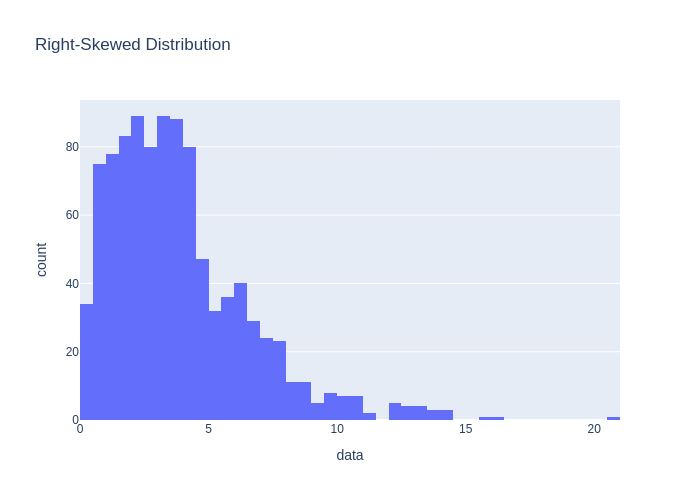

Right-Skewed Data -> Mean: 3.861640261899869, Median: 3.3624902606787956


In [39]:
import plotly.express as px

# Generate right-skewed data
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Plot right-skewed data
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data", title="Right-Skewed Distribution")
fig1.show(renderer="png")

# Calculate mean and median
mean1 = sample1.mean()
median1 = np.quantile(sample1, [0.5])[0]

print(f"Right-Skewed Data -> Mean: {mean1}, Median: {median1}")

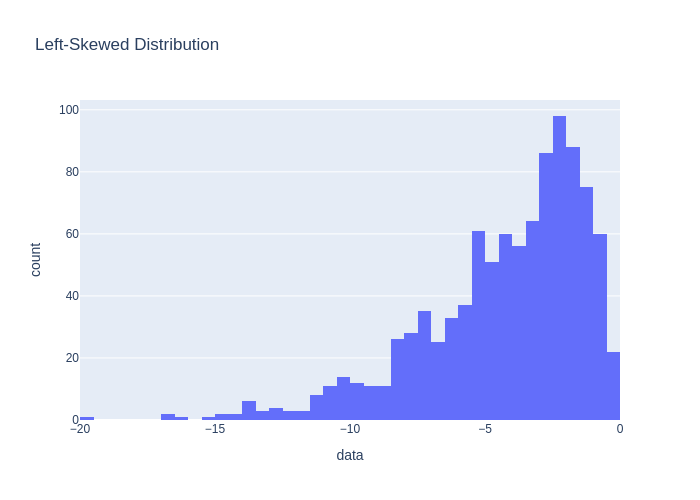

Left-Skewed Data -> Mean: -4.313805029381287, Median: -3.572985393431873


In [40]:
# Generate left-skewed data by negating gamma
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Plot left-skewed data
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data", title="Left-Skewed Distribution")
fig2.show(renderer="png")

# Calculate mean and median
mean2 = sample2.mean()
median2 = np.quantile(sample2, [0.5])[0]

print(f"Left-Skewed Data -> Mean: {mean2}, Median: {median2}")


### Relationship Explanation (With Code Demonstration)

- In **right-skewed distributions** (as generated by `sample1`), the presence of extreme values on the right pulls the mean to the right, making it larger than the median.
  
- In **left-skewed distributions** (as generated by `sample2`), extreme values on the left pull the mean to the left, making it smaller than the median.

This skewness is a result of how the mean incorporates all data points, including outliers, whereas the median is more robust to extreme values.

Would you like me to run this code to visualize the distributions and check the calculations for you?

# 6.

In [41]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


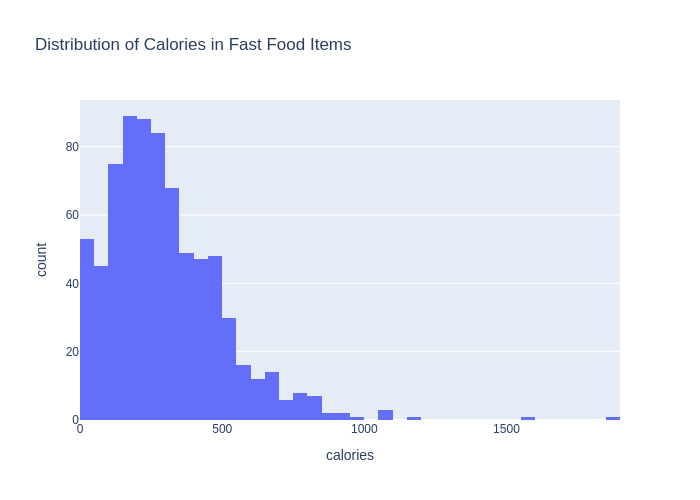

In [44]:
import plotly.express as px
# Histogram for Calories
fig_calories = px.histogram(df, x='calories', title='Distribution of Calories in Fast Food Items', nbins=50)
fig_calories.show(renderer="png")


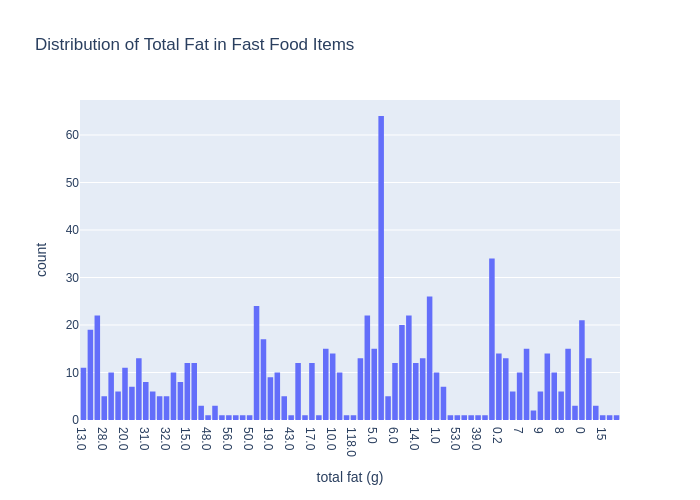

In [45]:
# Histogram for Total Fat
fig_fat = px.histogram(df, x='total fat (g)', title='Distribution of Total Fat in Fast Food Items', nbins=50)
fig_fat.show(renderer="png")


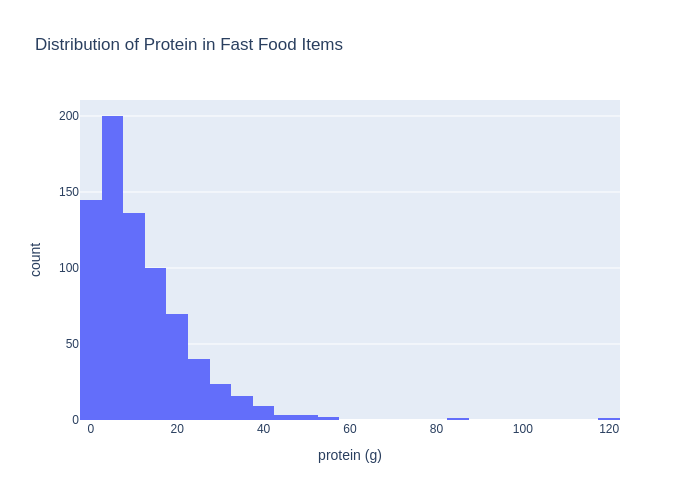

In [46]:
# Histogram for Protein
fig_protein = px.histogram(df, x='protein (g)', title='Distribution of Protein in Fast Food Items', nbins=50)
fig_protein.show(renderer="png")


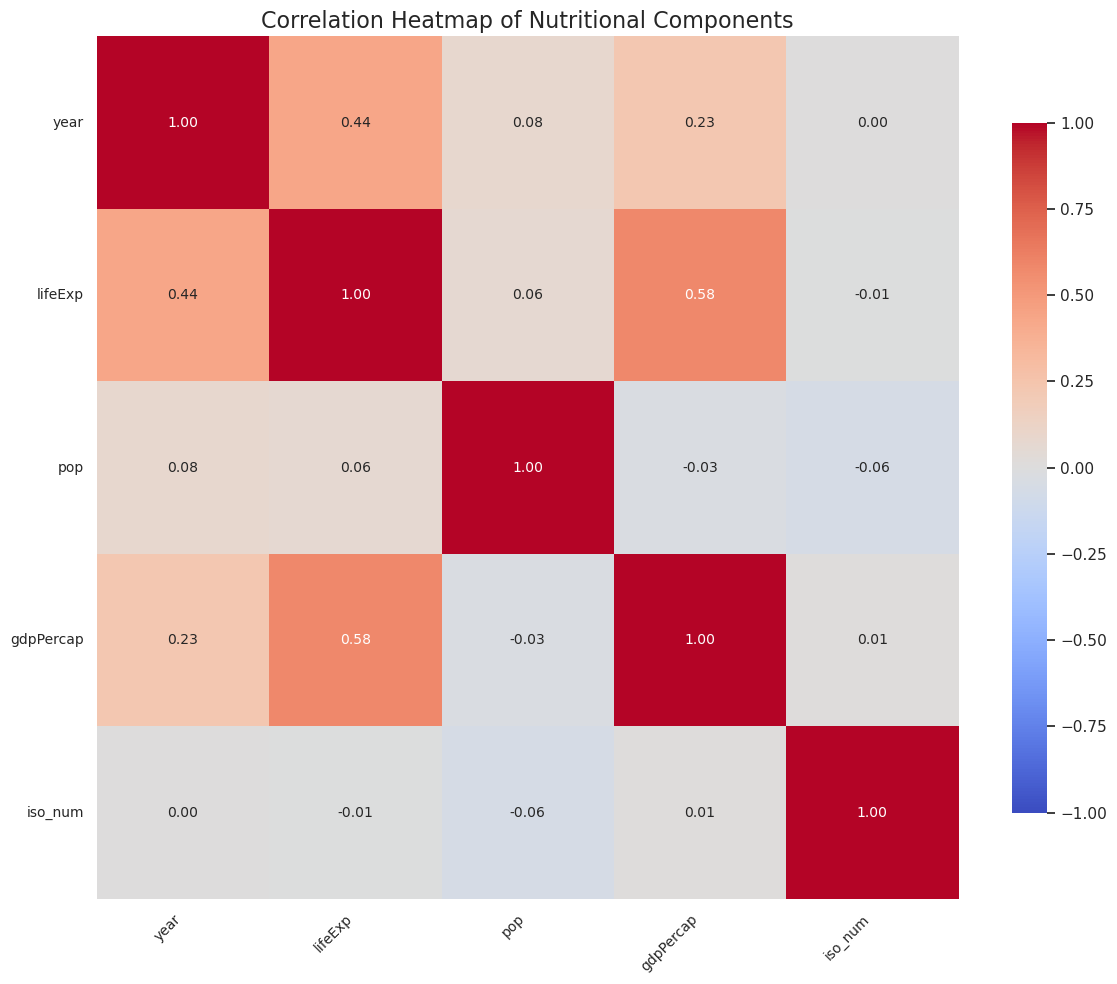

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))  # Increase figure size
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, 
            cbar_kws={"shrink": .8}, annot_kws={"size": 10})  # Adjust annotation size

# Rotate x and y labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.title("Correlation Heatmap of Nutritional Components", fontsize=16)
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()

In [50]:
pip install palmerpenguins

Note: you may need to restart the kernel to use updated packages.


In [52]:
import plotly.express as px
from palmerpenguins import load_penguins
import numpy as np

# Load the pingees dataset
df = load_penguins()

# Drop rows with missing values in body mass
df = df.dropna(subset=['body_mass_g'])

# Check the dataset
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


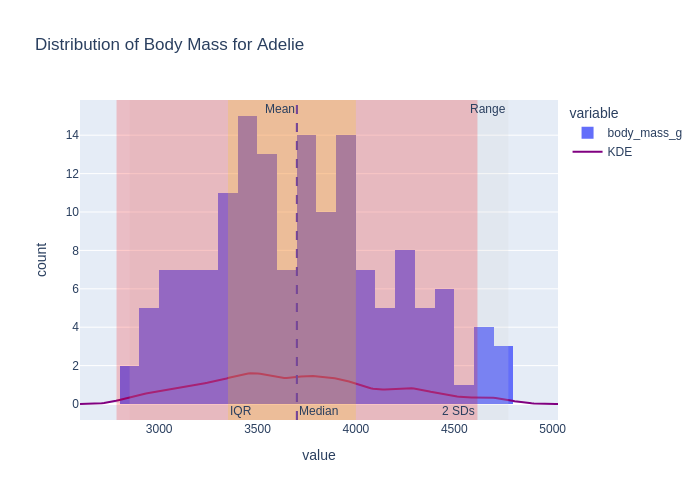

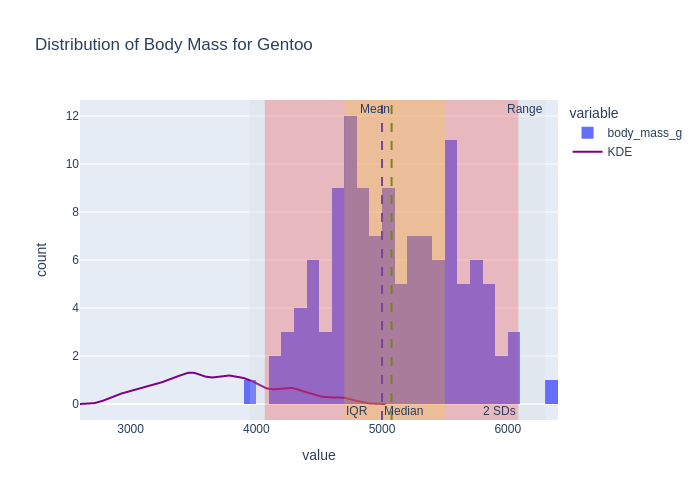

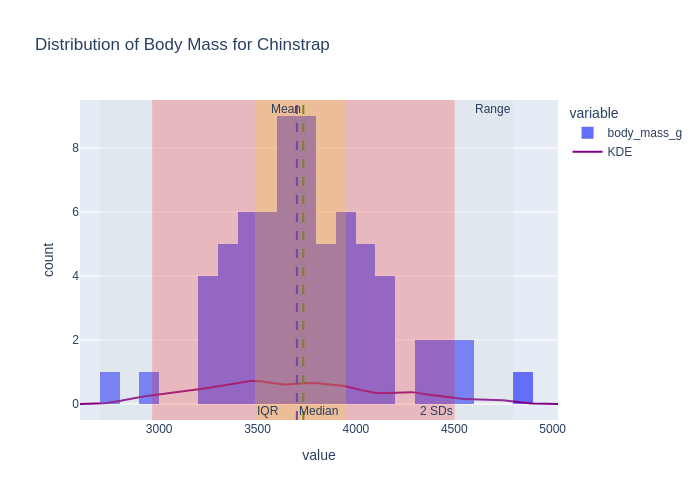

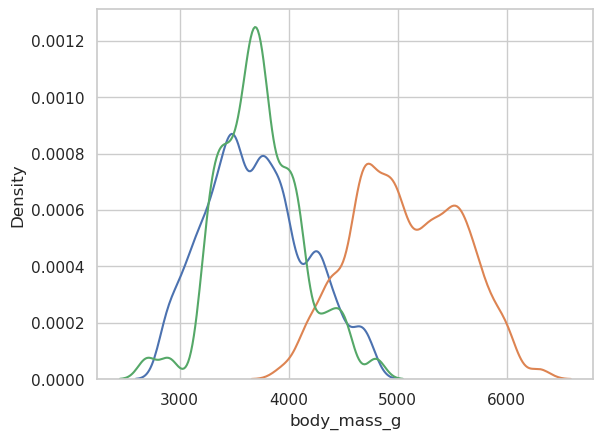

In [55]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from palmerpenguins import load_penguins
import seaborn as sns
import pandas as pd


# Load the penguins dataset
df = load_penguins()

# Drop rows with missing values in body mass
df = df.dropna(subset=['body_mass_g'])

# Function to compute summary statistics for a specific species
def get_summary_stats(df, species):
    species_data = df[df['species'] == species]['body_mass_g']
    
    # Mean and median
    mean = species_data.mean()
    median = species_data.median()
    
    # Range (min, max)
    range_min = species_data.min()
    range_max = species_data.max()
    
    # Interquartile range (IQR)
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    
    # Standard deviations
    std_dev = species_data.std()
    
    return mean, median, range_min, range_max, q1, q3, std_dev
import seaborn as sns

# List of unique species
species_list = df['species'].unique()

# Iterate over each species and create histograms with KDE and markings
for species in species_list:
    species_data = df[df['species'] == species]['body_mass_g']
    
    # Get summary stats for this species
    mean, median, range_min, range_max, q1, q3, std_dev = get_summary_stats(df, species)
    
    # Create the histogram with KDE (using Seaborn for KDE and getting values)
    sns_kde = sns.kdeplot(species_data, bw_adjust=0.5).get_lines()[0].get_data()
    kde_x, kde_y = sns_kde[0], sns_kde[1]  # Extract KDE line data
    
    # Create histogram using Plotly
    fig = px.histogram(species_data, nbins=30, title=f'Distribution of Body Mass for {species}')
    
    # Add KDE line (smoothed density estimate)
    fig.add_trace(go.Scatter(x=kde_x, y=kde_y * len(species_data) * (kde_x[1] - kde_x[0]), 
                             mode='lines', name='KDE', line=dict(color='purple', width=2)))
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line_dash="dash", line_color="green", annotation_text="Mean", annotation_position="top left")
    fig.add_vline(x=median, line_dash="dash", line_color="blue", annotation_text="Median", annotation_position="bottom right")
    
    # Add vertical rectangles for range, IQR, and 2 standard deviations from mean
    fig.add_vrect(x0=range_min, x1=range_max, fillcolor="lightgray", opacity=0.2, line_width=0, annotation_text="Range", annotation_position="top right")
    fig.add_vrect(x0=q1, x1=q3, fillcolor="yellow", opacity=0.2, line_width=0, annotation_text="IQR", annotation_position="bottom left")
    fig.add_vrect(x0=(mean - 2*std_dev), x1=(mean + 2*std_dev), fillcolor="red", opacity=0.2, line_width=0, annotation_text="2 SDs", annotation_position="bottom right")
    
    # Show the plot
    fig.show(renderer="png")


# 7.

In [65]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

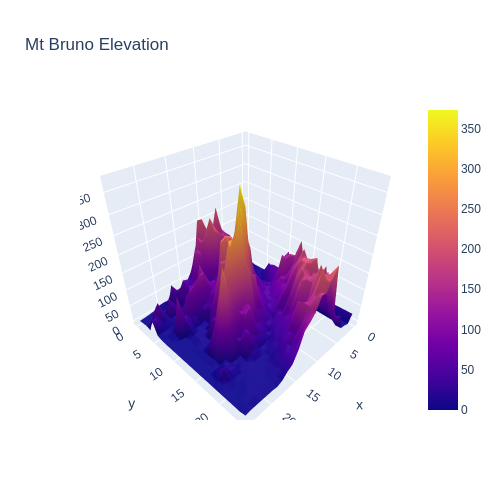

In [66]:
import plotly.graph_objects as go
import pandas as pd

z_data = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv")

fig = go.Figure(
    data=go.Surface(z=z_data.values),
    layout=go.Layout(
        title="Mt Bruno Elevation",
        width=500,
        height=500,
    ))
fig.show(renderer='png')

# 8.

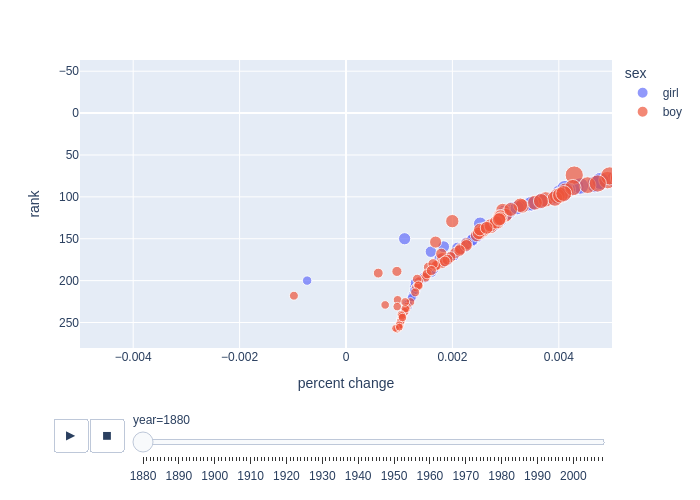

In [71]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(
    bn, 
    x="percent change",         # X-axis: the percent change of the name's prevalence
    y="rank",                   # Y-axis: the rank of the name for the given year
    animation_frame="year",      # Animation over time (year)
    animation_group="name",      # The name of the baby for grouping across frames
    size="percent",              # Size of the bubble will represent the percent of babies with the name
    color="sex",                 # Color the points based on the sex of the name
    hover_name="name",           # Show the name of the baby on hover
    size_max=50,                 # Max size of bubbles
    range_x=[-0.005, 0.005]      # Range for the X-axis (percent change)
)

# Inverting the y-axis so that rank 1 appears at the top
fig.update_yaxes(autorange='reversed') 

# Show the figure
fig.show(renderer="png")

# 9.

### Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yes, I did review the course wiki-textbook and interacted with a ChatBot.